# Monday, April 17th, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conway's Game of Life

Conway's [Game of Life](https://conwaylife.com/wiki/Conway%27s_Game_of_Life) is a cellular automaton created by John Conway in 1970. Similar to the Mayfly model, it is a deterministic process to update the state of a population of cells.

We will use 2D NumPy arrays to represent the population of cells aranged in an $n \times n$ grid.
A value of `1` will signify that a cell is alive while a value of `0` will signify that a cell is dead.

### Starting configuration

Lets begin with an $ n\times n $ array of all 0s with a small three-block column (3$\times$1) of 1s in the middle. Use an integer datatype (`dtype=int`) when defining your array.

**Exercise:**  Write a function `starting_state(n)` that returns the array described above.

In [2]:
def starting_state(n):
    cells = np.zeros((n,n), dtype=int)
    
    # I'm making a 1x3 row:
    cells[n//2, n//2-1:n//2+2] = 1

    return cells




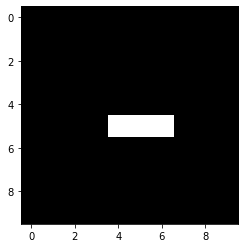

In [3]:
cells = starting_state(10)

plt.imshow(cells,cmap='gray')





### Rules of Life

We will use the current state of the population to determine the next state.
In the Game of Life, each cell interacts with its eight neighbors (i.e. the horizontally, vertically, or diagonally adjacent cells).

![neighbors](https://jllottes.github.io/_images/epidemic-2.svg)

The rules of the Game of Life can be summarized as follows:

 1. Any live cell with two or three live neighbors survives.
 2. Any dead cell with with three live neighbors becomes a live cell.
 3. All other live cells die in the next generation, and all other dead cells stay dead.

### Counting the number of live neighbors

In order to update our array from one state to the next, we need to be able to count the number of live neighbors of the $(i,j)$th cell for any choice of $i,j$.

**Exercise:** Write a function `count_live_neighbors(cells,i,j)` that counts the number of living neighbors of the $(i,j)$th cell.

 - We handled a similar problem with the [Image Denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising) project.
 - How can we handle cells on the edge of the grid?
 - The `np.sum` function will add all values in an array.
 - We want to exclude (or remove from the sum) the $(i,j)$th cell when counting the number of living neighbors.



In [6]:
def count_live_neighbors(cells,i,j):
    nrows, ncols = cells.shape
    border_cells = np.zeros((nrows+2,ncols+2),dtype=int)
    
    border_cells[1:-1, 1:-1] = cells
    grid = border_cells[i:i+3, j:j+3]
    
    return np.sum(grid) - cells[i,j]

In [7]:
count_live_neighbors(cells,4,5)

3

### Updating the `cells` population

We can now update the `cells` array according to the rules.  We have to update every entry of the array, so we will need to loop through all the entries.

**Exercise:** Write a function `update_cells(cells)` that takes in a population array `cells`, applies the Rules of Life to update the population, and returns the updated population.

In [8]:
def update_cells(cells):
    new_cells = cells.copy()
    nrows, ncols = cells.shape
    
    for i in range(nrows):
        for j in range(ncols):
            #... apply the rules of life
            count = count_live_neighbors(cells,i,j)
            if cells[i,j] == 1:
                if count in [2,3]:
                    new_cells[i,j] = 1
                else:
                    new_cells[i,j] = 0
            elif cells[i,j] == 0:
                if count == 3:
                    new_cells[i,j] = 1
            else:
                new_cells[i,j] = 0
                
    return new_cells

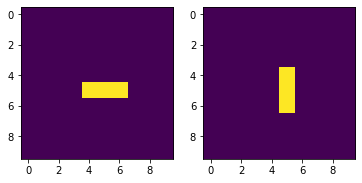

In [9]:
cells = starting_state(10)

new_cells = update_cells(cells)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cells)

plt.subplot(1,2,2)
plt.imshow(new_cells)

### Animating the dynamics

The `FuncAnimation` function from `matplotlib.animation` can be used to create animations.
It takes in a figure `fig` and function `animate`. The `animate` function should take in a frame index `i` and perform any desired updates to the figure.

In [10]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

**Exercise:** Modify the code below to animate the Game of Life.

<IPython.core.display.Javascript object>


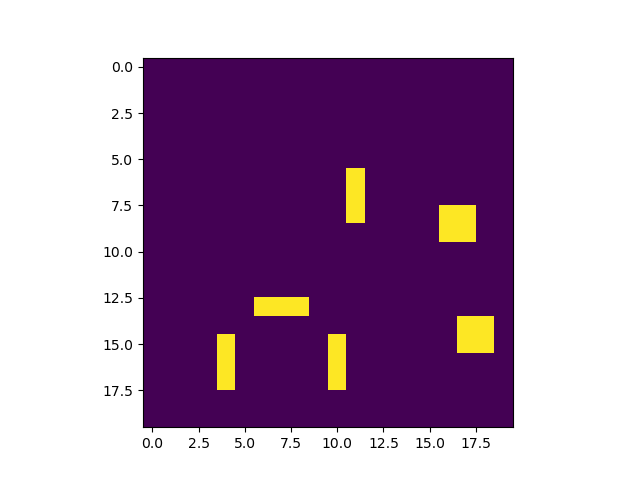

In [11]:
#cells = starting_state(20)

N = 20

cells = np.zeros((N,N),dtype=int)

mask = np.random.rand(N,N) < 0.15  # approximately 15% of the cells
cells[mask] = 1                    # bring to life

fig = plt.figure()
im = plt.imshow(cells,vmin=0,vmax=1)

def animate(i):
    global cells
    cells=update_cells(cells)
    im.set_data(cells)
    return im

anim = FuncAnimation(fig, animate, interval=400)
plt.show()

**Exercise:** Use `np.random.rand` to randomly select an initial `cells` array of `0`s and `1`s.

# Wednesday, April 19th, 2023

Last time, we added an artificial border around the grid so that we could easily take a slice with the 8 neighbors.

We can also consider using `np.roll`.
This function will shift elements of an array and wrap around on the edge elements.

Calling sequence: 

`np.roll(a,shift,[axis])`

In [14]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.roll(a,1)

array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
np.roll(a,-2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [19]:
b = np.arange(20).reshape(5,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [20]:
np.roll(b,1)

array([[19,  0,  1,  2],
       [ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [11, 12, 13, 14],
       [15, 16, 17, 18]])

In [21]:
np.roll(b,1,axis=0)

array([[16, 17, 18, 19],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [22]:
np.roll(b,1,axis=1)

array([[ 3,  0,  1,  2],
       [ 7,  4,  5,  6],
       [11,  8,  9, 10],
       [15, 12, 13, 14],
       [19, 16, 17, 18]])

We can also send in a tuple for the shift, and tuple for the axes:

In [23]:
np.roll(b, (1,2), axis=(0,1))

array([[18, 19, 16, 17],
       [ 2,  3,  0,  1],
       [ 6,  7,  4,  5],
       [10, 11,  8,  9],
       [14, 15, 12, 13]])

Can we use `np.roll` to create a `3` by `3` grid centered at cell `[i,j]` that wraps to the opposite side of the array when we're on the border?

In [28]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [29]:
i = 3
j = 3

grid = b[i-1:i+2, j-1:j+2]
#grid = np.roll(b,1-i,axis=0)
grid

array([[10, 11],
       [14, 15],
       [18, 19]])

In [31]:
print(b[i,j])

15


In [32]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [33]:
np.roll(b,(1-i,1-j),axis=(0,1))

array([[10, 11,  8,  9],
       [14, 15, 12, 13],
       [18, 19, 16, 17],
       [ 2,  3,  0,  1],
       [ 6,  7,  4,  5]])

In [35]:
grid = np.roll(b,(1-i,1-j),axis=(0,1))[:3,:3]
grid

array([[10, 11,  8],
       [14, 15, 12],
       [18, 19, 16]])

Let's try a new `count_live_neighbors` function that uses `np.roll` to apply periodic boundary conditions:

In [36]:
def count_live_neighbors(cells,i,j):
    grid = np.roll(cells,(1-i,1-j),axis=(0,1))[:3,:3]
    return np.sum(grid) - cells[i,j]

<IPython.core.display.Javascript object>


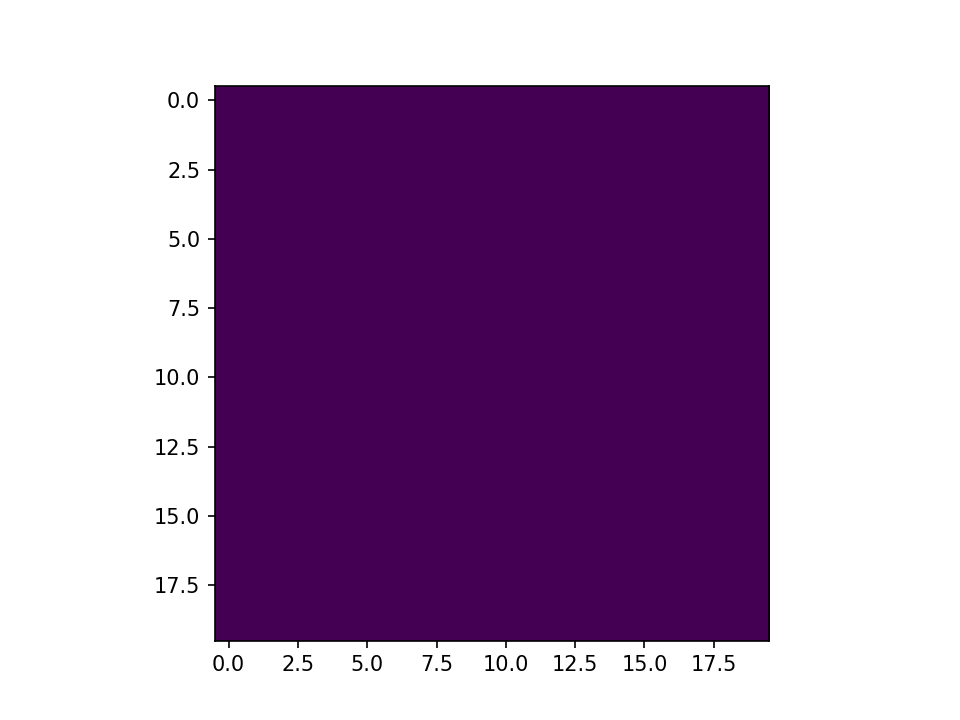

In [39]:
#cells = starting_state(20)

N = 20

cells = np.zeros((N,N),dtype=int)

mask = np.random.rand(N,N) < 0.15  # approximately 15% of the cells
cells[mask] = 1                    # bring to life

#cells[8:11,10] = 1
#cells[10,9] = 1
#cells[9,8] = 1

fig = plt.figure()
im = plt.imshow(cells,vmin=0,vmax=1)

def animate(i):
    global cells
    cells=update_cells(cells)
    im.set_data(cells)
    return im

anim = FuncAnimation(fig, animate, interval=400)
plt.show()

## Code breakers

In [42]:
with open('hehr.txt') as f:
    s = f.read()

In [47]:
[int(c) for c in s.split()]

[119,
 60,
 73,
 9,
 92,
 66,
 106,
 74,
 13,
 71,
 83,
 77,
 109,
 13,
 20,
 88,
 92,
 90,
 80,
 21,
 20,
 66,
 98,
 73,
 13,
 78,
 82,
 93,
 89,
 77,
 96,
 78,
 84,
 74,
 82,
 76,
 89,
 15,
 20,
 57,
 92,
 5,
 88,
 81,
 89,
 1,
 86,
 84,
 81,
 94,
 4,
 75,
 89,
 77,
 99,
 83,
 84,
 5,
 88,
 81,
 89,
 107,
 103,
 74,
 91,
 88,
 73,
 92,
 32,
 1,
 104,
 84,
 13,
 89,
 76,
 78,
 20,
 84,
 99,
 90,
 89,
 5,
 88,
 81,
 89,
 1,
 100,
 70,
 96,
 88,
 77,
 88,
 98,
 84,
 32,
 5,
 97,
 84,
 4,
 93,
 92,
 70,
 20,
 78,
 91,
 89,
 73,
 85,
 96,
 74,
 91,
 74,
 91,
 72,
 73,
 9,
 100,
 83,
 93,
 83,
 80,
 78,
 84,
 85,
 89,
 84,
 34,
 5,
 65,
 84,
 110,
 75,
 89,
 1,
 85,
 75,
 83,
 74,
 71,
 93,
 89,
 69,
 20,
 71,
 102,
 5,
 88,
 81,
 89,
 1,
 93,
 82,
 78,
 76,
 73,
 91,
 109,
 1,
 99,
 75,
 13,
 88,
 73,
 87,
 103,
 70,
 20,
 71,
 82,
 81,
 83,
 87,
 91,
 84,
 20,
 89,
 92,
 5,
 88,
 81,
 89,
 1,
 86,
 74,
 78,
 88,
 88,
 92,
 20,
 80,
 90,
 5,
 97,
 77,
 73,
 9,
 90,
 74,
 89,
 81,
 81,
 11

Outline:

 1. Try a word as the key
 2. Decrypt the message using that key
 3. Get a list of "words" that appear in the decrypted message
 4. Count how many of the "words" are actual words
 5. Check which key gave the most actual words in the decrypted message